In [1]:
from fNeuro.MVPA.mvpa_functions import load_pickle
import os
from decouple import config
import cyclicityanalysis.orientedarea as cao
import cyclicityanalysis.coom as coom
import pandas as pd
from nilearn import datasets, plotting
import numpy as np
from math import sqrt

In [2]:
time_series = load_pickle(os.path.join(config('resting'), 'measures', 'time_series'))
an_time_series = time_series['an']
hc_time_series = time_series['hc']
msdl = datasets.fetch_atlas_msdl()

In [3]:
df = pd.DataFrame(an_time_series[0])
df.columns = msdl['labels']

In [4]:
oriented_area = cao.OrientedArea(df)
lead_lag_df = oriented_area.compute_lead_lag_df()


In [21]:
class Cyclic_analysis:
    def __init__(self, to_vectorize=True) -> None:
        '''
        Class to run Cyclic analysis on time series data

        Parameters
        ----------
        to_vectorize: bool (default is true)
            If true then will do nilearn Connectivity measure type vectorization

        Return
        ------
        None

        '''
        self.to_vectorize = to_vectorize

    def vectorize(self, symmetric: np.array) -> np.array:
        '''
        Nilearn's vectorize to return the lower triangluation of a matrix
        in 1D format.
    
        Parameters
        ----------
        symmetric: np.array 
            Correlation matrix
        
        Returns
        -------
        np.array: 1D numpy array
            array of lower triangluation of a matrix
        '''
        scaling = np.ones(symmetric.shape[-2:])
        np.fill_diagonal(scaling, sqrt(2.0))
        tril_mask = np.tril(np.ones(symmetric.shape[-2:])).astype(bool)
        return symmetric[..., tril_mask] / scaling[tril_mask]

    def cyclic_analysis(self, time_series: np.array) -> np.array:

        '''
        Function to perform cyclic analysis on an individual time series
        
        Parameters
        ----------
        time_series: np.array
            time series
        
        Returns
        -------
        np.array: 1D numpy array
            array of lower triangluation of a matrix
        '''
    
        df = pd.DataFrame(time_series)
        oriented_area = cao.OrientedArea(df)
        lead_lag_df = oriented_area.compute_lead_lag_df()
        if self.to_vectorize == True:
            return self.vectorize(lead_lag_df.values)
        else:
            return lead_lag_df.values
    
    def fit(self, time_series: np.array) -> np.array:
    
        '''
        Function to perform a cyclic analysis of time series
    
        Parameters
        ----------
        time_series: np.array
            time series
        
        Returns
        -------
        np.array: 1D numpy array
            array of lower triangluation of a matrix
        '''
        
        return np.array(list(map(self.cyclic_analysis, time_series)))

In [5]:
def vectorize(symmetric: np.array) -> np.array:
    '''
    Nilearn's vectorize to return the lower triangluation of a matrix
    in 1D format.

    Parameters
    ----------
    symmetric: np.array 
        Correlation matrix
    
    Returns
    -------
    np.array: 1D numpy array
        array of lower triangluation of a matrix
    '''
    scaling = np.ones(symmetric.shape[-2:])
    np.fill_diagonal(scaling, sqrt(2.0))
    tril_mask = np.tril(np.ones(symmetric.shape[-2:])).astype(bool)
    return symmetric[..., tril_mask] / scaling[tril_mask]

In [19]:
def individual_cyclic_analysis(time_series: np.array) -> np.array:

    '''
    Function to perform cyclic analysis on an individual time series
    
    Parameters
    ----------
    time_series: np.array
        time series
    
    Returns
    -------
    np.array: 1D numpy array
        array of lower triangluation of a matrix
    '''

    df = pd.DataFrame(time_series)
    oriented_area = cao.OrientedArea(df)
    lead_lag_df = oriented_area.compute_lead_lag_df()
    return vectorize(lead_lag_df.values)



In [20]:
def cyclic_analysis(time_series: np.array) -> np.array:
    
    '''
    Function to perform a cyclic analysis of time series

    Parameters
    ----------
    time_series: np.array
        time series
    
    Returns
    -------
    np.array: 1D numpy array
        array of lower triangluation of a matrix
    '''
    
    return np.array(list(map(individual_cyclic_analysis, time_series)))

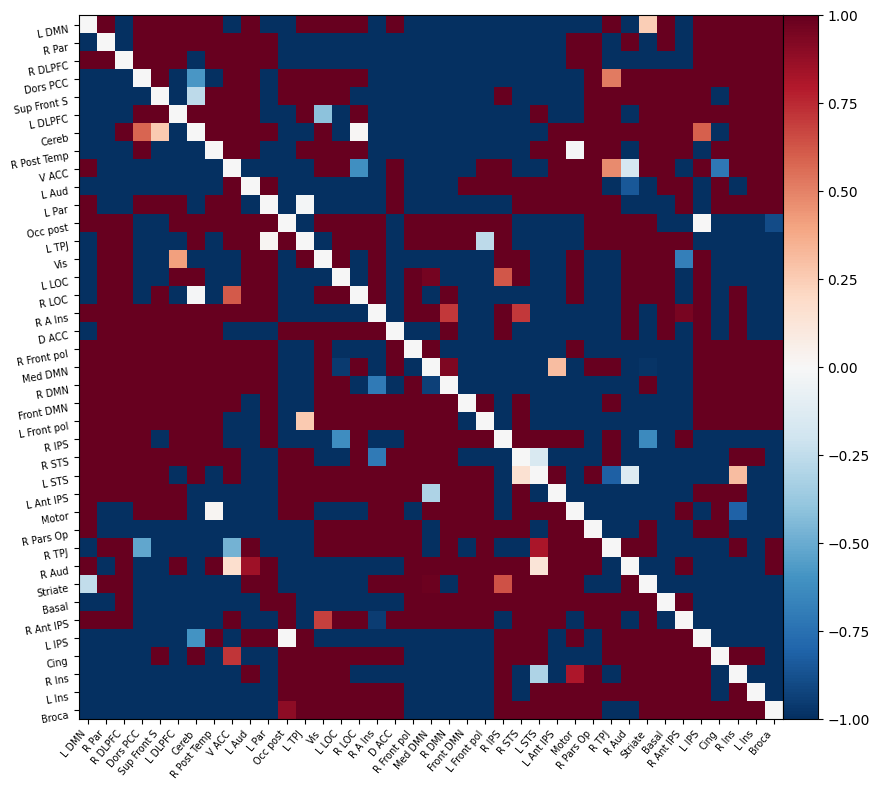

In [23]:
plotting.plot_matrix(
    lead_lag_df.values,
    figure=(10, 8),
    labels=msdl['labels'],
    vmax=1,
    vmin=-1,
    reorder=True,
)

In [20]:
eigen = coom.COOM(lead_lag_df)
eigenvalue_moduli = eigen.eigenvalue_moduli
leading_eigenvector,leading_eigenvector_component_phases, sequential_order_dict = eigen.compute_sequential_order(0)

In [21]:
leading_eigenvector[1]

(0.14146156038962912-0.11390463712412953j)